In [159]:
import numpy as np
import pandas as pd
import re
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import Binarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [232]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid(df , row = row , col = col)
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True)
    facet.set( xlim=(0, df[var].max()))
    facet.add_legend()
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

In [161]:
testset = pd.read_csv("./titanic/test.csv")
trainset = pd.read_csv("./titanic/train.csv")
full = trainset.append(testset, ignore_index = True)
train = full[:891]

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [162]:
train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [163]:
train.isnull().sum()

Age            177
Cabin          687
Embarked         2
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64

In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.6+ KB


In [165]:
train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


In [166]:
train.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,204,889,891,891,891
unique,147,3,891,2,681
top,C23 C25 C27,S,"Gilnagh, Miss. Katherine ""Katie""",male,1601
freq,4,644,1,577,7


0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64
male      0.647587
female    0.352413
Name: Sex, dtype: float64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


Text(0.5,0,'ratio')

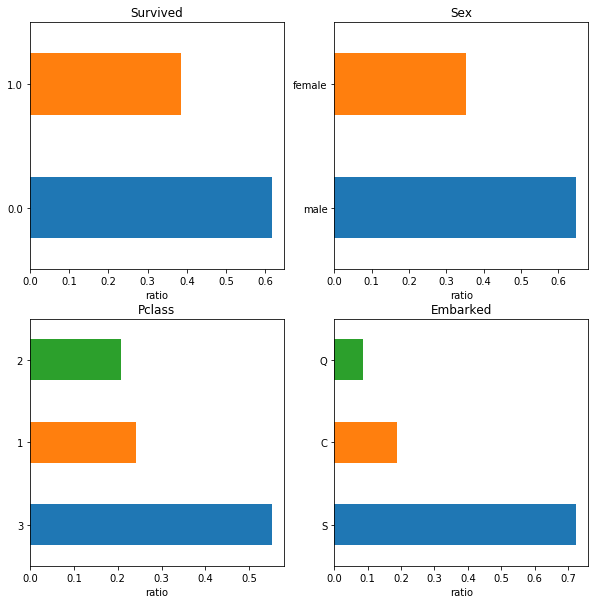

In [167]:
# distribution
fig = plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
p1 = train.Survived.value_counts(normalize=True)
print(p1/p1.sum())
p1.plot(kind='barh')
plt.title('Survived')
plt.xlabel('ratio')

plt.subplot(2,2,2)
p2 = train.Sex.value_counts(normalize=True)
print(p2/p2.sum())
p2.plot(kind='barh')
plt.title('Sex')
plt.xlabel('ratio')

plt.subplot(2,2,3)
p3 = train.Pclass.value_counts(normalize=True)
print(p3/p3.sum())
p3.plot(kind='barh')
plt.title('Pclass')
plt.xlabel('ratio')

plt.subplot(2,2,4)
p4 = train.Embarked.value_counts(normalize=True)
print(p4/p4.sum())
p4.plot(kind='barh')
plt.title('Embarked')
plt.xlabel('ratio')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20d6a5f8>,
      dtype=object)

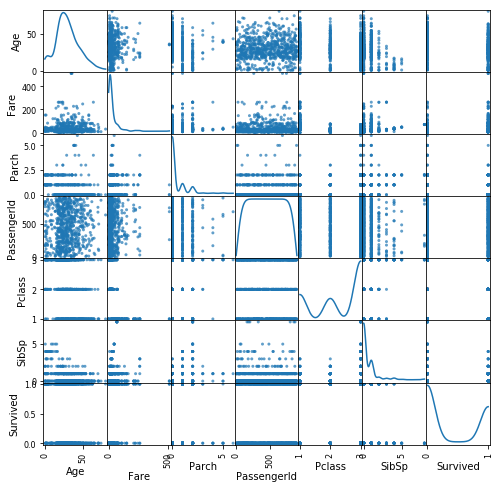

In [168]:
pd.plotting.scatter_matrix(train, alpha=0.7, figsize=(8,8),diagonal='kde')

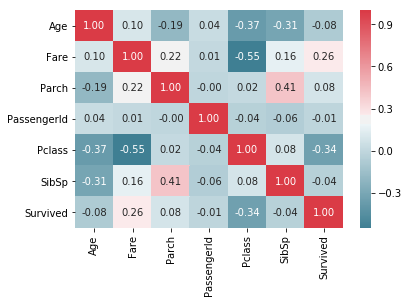

In [169]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train.corr(), cmap=colormap,annot=True, fmt=".2f")
plt.show()

In [170]:
# Corr (Pclass, survival)
train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [171]:
# Corr (SibSp, survival)
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [172]:
# Corr (Parch, survival)
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [173]:
# Corr (Sex, survival)
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [174]:
# Corr (Embarked, survival)
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


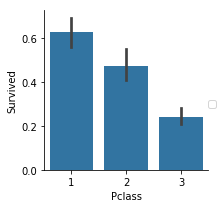

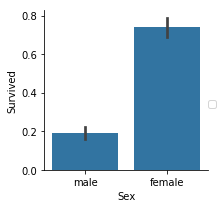

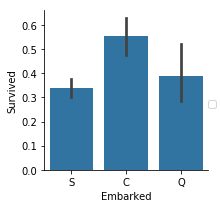

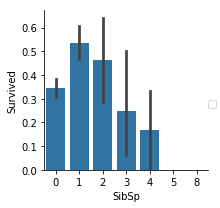

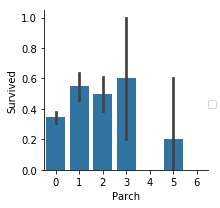

In [175]:
plot_categories(train, cat = 'Pclass', target = 'Survived')
plot_categories(train, cat = 'Sex', target = 'Survived')
plot_categories(train, cat = 'Embarked', target = 'Survived')
plot_categories(train, cat = 'SibSp', target = 'Survived')
plot_categories(train, cat = 'Parch', target = 'Survived')

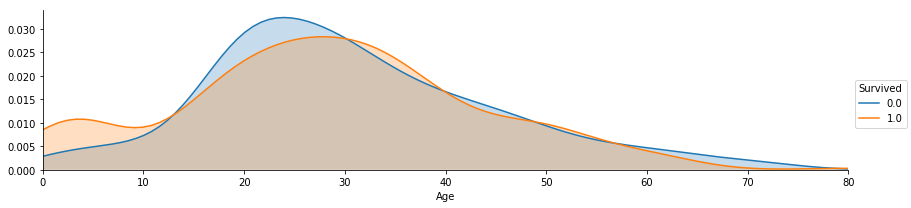

In [176]:
# Corr (Age, survival)
plot_distribution(train, var = 'Age', target = 'Survived')

(0, 100)

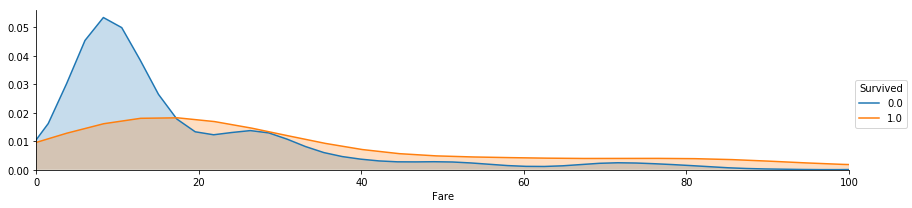

In [177]:
# Corr (Fare, survival)
plot_distribution(train, var = 'Fare', target = 'Survived')
plt.xlim(0,100)

In [178]:
# Data preparation
## Fill missing values
### Age: median
full['Age'] = full['Age'].fillna(np.random.normal(loc=full['Age'].mean(), scale=np.std(full['Age']))) 
### Fare: mean
full['Fare'] = full['Fare'].fillna(full['Fare'].median()) 
### Embarked: 'S'
full['Embarked'] = full['Embarked'].fillna('S') 

In [179]:
## Transform categorical variables to numeric variables
### Sex: male(1), female(0)
full['Sex'] = pd.Series(np.where(full['Sex'] == 'male', 1, 0), name = 'Sex')

In [180]:
### Embarked
Embarked = pd.get_dummies(full.Embarked, prefix='Embarked')

In [181]:
### Pclass
Pclass = pd.get_dummies(full.Pclass, prefix='Pclass')

In [182]:
## New feature
family = pd.DataFrame()
family['FamilySize'] = full['Parch'] + full['SibSp'] + 1
family['Family_Single'] = family['FamilySize'].map(lambda x : 1 if x == 1 else 0 )
family['Family_Small']  = family['FamilySize'].map(lambda x : 1 if 2 <= x <= 4 else 0 )
family['Family_Large']  = family['FamilySize'].map(lambda x : 1 if 5 <= x else 0 )

In [183]:
title = pd.DataFrame()
title['Title'] = full['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
Title_Dictionary = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"}
title['Title'] = title.Title.map(Title_Dictionary)
title = pd.get_dummies(title.Title)
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [184]:
full_X = full.filter(['Sex']).copy()
full_X = pd.concat([full_X, Pclass, Embarked, family, title], axis=1)
full_Y = train.filter(['Survived']).copy()

In [185]:
full_X.head()

,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Family_Single,Family_Small,Family_Large,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0,0,1,0,0,1,2,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,2,0,1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,2,0,1,0,0,0,0,1,0,0
4,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0


In [186]:
train_X = full_X[:891]
train_Y = full_Y[:891]
test_X = full_X[891:]

In [187]:
train_X.head()

,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Family_Single,Family_Small,Family_Large,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0,0,1,0,0,1,2,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,2,0,1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,2,0,1,0,0,0,0,1,0,0
4,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0


In [188]:
train_Y = train_Y.astype(int)

In [239]:
# # KNN
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(train_X, train_Y)
# scores_knn = cross_val_score(knn, train_X, train_Y, cv = 10, scoring='accuracy')
# print(np.mean(scores_knn))

In [222]:
# test_Y_knn = knn.predict(test_X)
# passenger_id = full[891:].PassengerId
# test_knn = pd.DataFrame({'PassengerId': passenger_id, 'Survived': test_Y_knn})
# test_knn.to_csv('/Users/xuluyao/Desktop/Data Mining/DM_assignment1/Q2/titanic_pred_knn.csv', index = False)

In [244]:
# Random forests
rfm = RandomForestClassifier(n_estimators=100)
rfm.fit(train_X, train_Y)
scores_rfm = cross_val_score(rfm, train_X, train_Y, cv = 10, scoring='accuracy')
print(np.mean(scores_rfm),np.std(scores_rfm))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was

0.8047520145272953 0.034962157220979714


0.8484848484848485


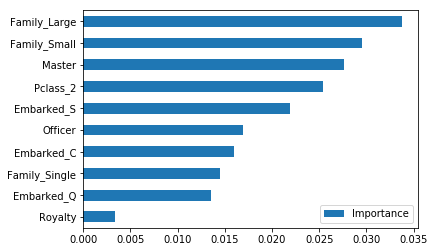

In [233]:
plot_model_var_imp(rfm, train_X, train_Y)

In [223]:
#rfm.get_params()

In [200]:
# test_Y_rfm = rfm.predict(test_X)
# passenger_id = full[891:].PassengerId
# test_rfm = pd.DataFrame({'PassengerId': passenger_id, 'Survived': test_Y_rfm})
# test_rfm.to_csv('/Users/xuluyao/Desktop/Data Mining/DM_assignment1/Q2/titanic_pred_rfm.csv', index = False)

In [191]:
# test_Y_rfm = rfm.predict(test_X)
# passenger_id = full[891:].PassengerId
# test_rfm = pd.DataFrame({'PassengerId': passenger_id, 'Survived': test_Y_rfm})
# test_rfm.to_csv('/Users/xuluyao/Desktop/Data Mining/DM_assignment1/Q2/titanic_pred_rfm.csv', index = False)

In [235]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(train_X, train_Y)
scores_gbc = cross_val_score(gbc, train_X, train_Y, cv = 10, scoring='accuracy')
print(np.mean(scores_gbc))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.8125924980138464


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8428731762065096


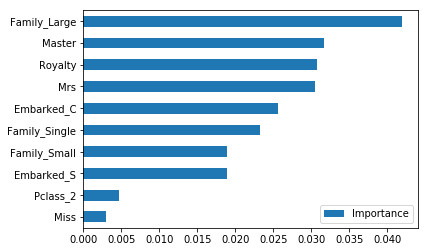

In [236]:
plot_model_var_imp(gbc, train_X, train_Y)

In [225]:
#gbc.get_params()

In [226]:
# test_Y_gbc = gbc.predict(test_X)
# passenger_id = full[891:].PassengerId
# test_gbc = pd.DataFrame({'PassengerId': passenger_id, 'Survived': test_Y_gbc})
# test_gbc.to_csv('/Users/xuluyao/Desktop/Data Mining/DM_assignment1/Q2/titanic_pred_gbc.csv', index = False)

In [245]:
# # Logistic Regression
lr = LogisticRegression()
lr.fit(train_X, train_Y)
scores_lr = cross_val_score(lr, train_X, train_Y, cv = 10, scoring='accuracy')
print(np.mean(scores_lr),np.std(scores_lr))

0.8305078878674385 0.029111543899408024


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [197]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [198]:
test_Y_lr = lr.predict(test_X)
passenger_id = full[891:].PassengerId
test_lr = pd.DataFrame({'PassengerId': passenger_id, 'Survived': test_Y_lr})
test_lr.to_csv('/Users/xuluyao/Desktop/Data Mining/DM_assignment1/Q2/titanic_pred_lr.csv', index = False)